In [85]:
#pip install wordcloud
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [136]:
data=pd.read_csv('jobs.csv')
data.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [137]:
##checking count of null values in each column 
data.isnull().sum()



Uniq Id                       0
Crawl Timestamp               0
Job Title                   575
Job Salary                   50
Job Experience Required     573
Key Skills                 1271
Role Category              2305
Location                    577
Functional Area             573
Industry                    573
Role                        901
dtype: int64

In [138]:
#removing null values from Job Title

mode_of_job_title=data['Job Title'].mode()
data['Job Title']=data['Job Title'].fillna(mode_of_job_title[0])


In [139]:
#removing null values from Job Salary

mode_of_job_salary=data['Job Salary'].mode()
data['Job Salary']=data['Job Salary'].fillna(mode_of_job_salary[0])

In [140]:
#removing null values from Job Experience Required

mode_of_Job_Experience_Required=data['Job Experience Required'].mode()
data['Job Experience Required']=data['Job Experience Required'].fillna(mode_of_Job_Experience_Required[0])

In [141]:
#removing null values from Key Skills

mode_of_Key_Skills=data['Key Skills'].mode()
data['Key Skills']=data['Key Skills'].fillna(mode_of_Key_Skills[0])

In [142]:
#removing null values from Role Category

mode_of_Role_Category=data['Role Category'].mode()
data['Role Category']=data['Role Category'].fillna(mode_of_Role_Category[0])

In [143]:
#removing null values from Location

mode_of_Location=data['Location'].mode()
data['Location']=data['Location'].fillna(mode_of_Location[0])

In [144]:
#removing null values from Functional Area

mode_of_Functional_Area=data['Functional Area'].mode()
data['Functional Area']=data['Functional Area'].fillna(mode_of_Functional_Area[0])

In [145]:
#removing null values from Industry

mode_of_Industry=data['Industry'].mode()
data['Industry']=data['Industry'].fillna(mode_of_Industry[0])

In [146]:
#removing null values from Role

mode_of_Role=data['Role'].mode()
data['Role']=data['Role'].fillna(mode_of_Role[0])

In [133]:
# deleting columns which are not required

data=data.drop(labels=['Uniq Id','Crawl Timestamp'], axis=1,inplace=True)

In [147]:
##checking null count 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  30000 non-null  object
 1   Crawl Timestamp          30000 non-null  object
 2   Job Title                30000 non-null  object
 3   Job Salary               30000 non-null  object
 4   Job Experience Required  30000 non-null  object
 5   Key Skills               30000 non-null  object
 6   Role Category            30000 non-null  object
 7   Location                 30000 non-null  object
 8   Functional Area          30000 non-null  object
 9   Industry                 30000 non-null  object
 10  Role                     30000 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [148]:
data.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


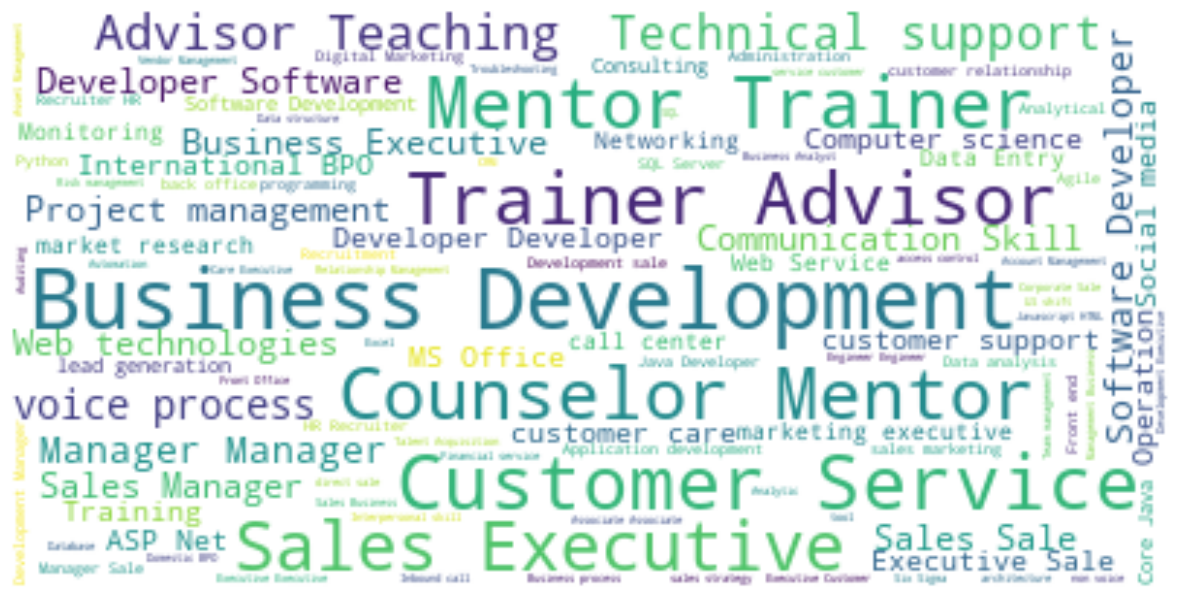

In [86]:
##creating a word cloud for key skills column 
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### We can see Business Dev, Advisor, Trainer, Customer Service are among the top key skills mentioned 

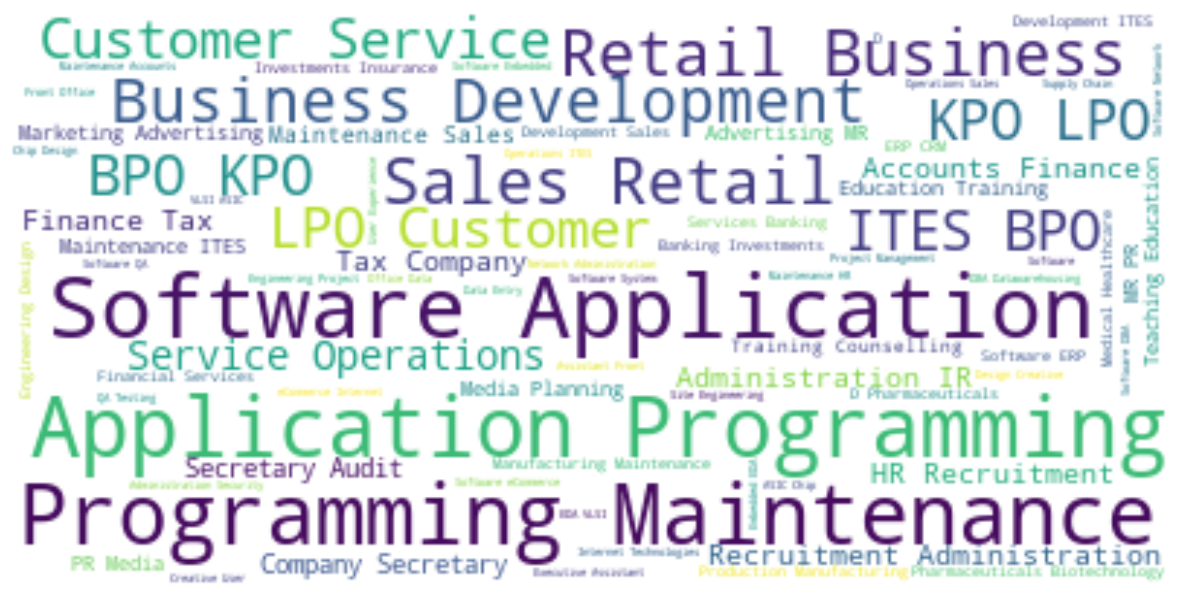

In [92]:
##creating a word cloud for key Functional Area column 
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###### we can see that Software application, application programing, Sales are among the top funcitonal areas 

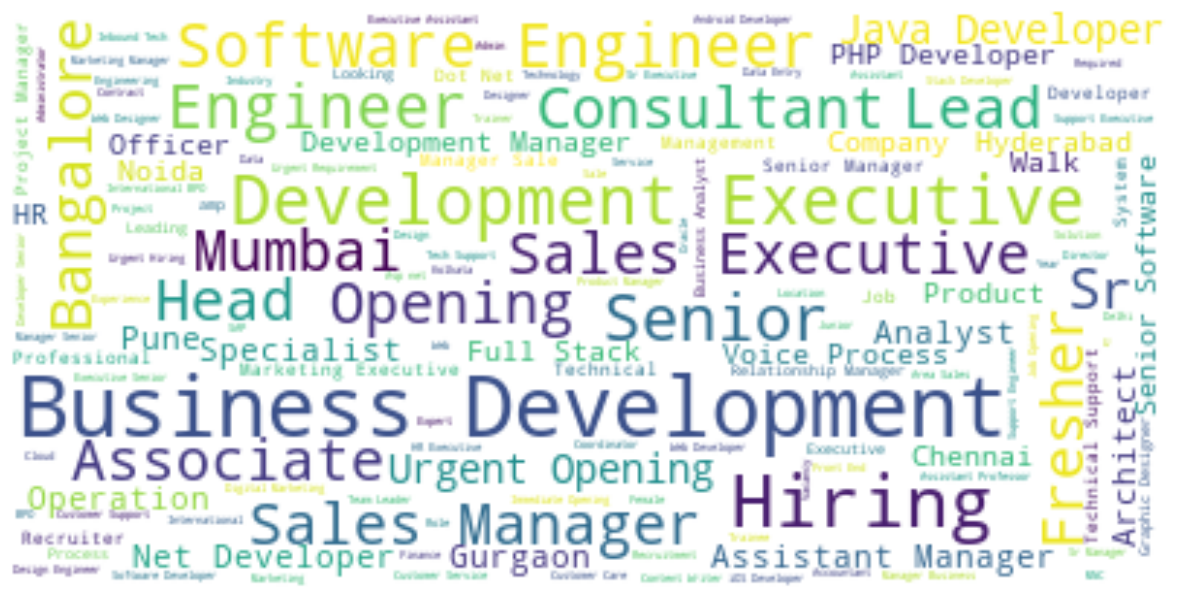

In [108]:
##creating a word cloud for key Job Title column 
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###### we can see business dev, Engineer, Fresher among the top Job titles mentioned 

In [149]:
from sklearn.feature_extraction import text
feature = data["Key Skills"].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [214]:
tfidf

TfidfVectorizer(input=[' Media Planning| Digital Media',
                       ' pre sales| closing| software knowledge| clients| '
                       'requirements| negotiating| client| online bidding| '
                       'good communication| technology',
                       ' Computer science| Fabrication| Quality check| '
                       'Intellectual property| Electronics| Support services| '
                       'Research| Management| Human resource management| '
                       'Research Executive',
                       ' Technical Supp...
                       'improvement| SIDE| development| Front end| it',
                       ' Articulate Storyline',
                       ' Area Sales Management| Retail Sales| FMCG| Chocolate| '
                       'confectionary| ASM| Area Sales Manager| area business '
                       'manager',
                       ' C#| Java| OOP| C++| Multithreading| UML| OOAD| OOPS| '
                      

In [188]:
##setting job title column as the index of the dataset so that the users can find similar jobs according to the job they are looking for
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()
indices


Job Title
 Digital Media Planner                                            0
 Online Bidding Executive                                         1
 Trainee Research/ Research Executive- Hi- Tech Operations        2
 Technical Support                                                3
 Software Test Engineer -hyderabad                                4
                                                              ...  
 MTS-Software-Engineer                                        29995
 Client Relationship Manager                                  29996
 Assoc. Prof.- CS                                             29997
 Application/Cyber Security Specialist-Pune                   29998
 Press Release Writer - SEO                                   29999
Length: 30000, dtype: int64

In [189]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]




In [196]:
print(jobs_recommendation(" Assoc. Prof.- CS"))

                                         Job Title Job Experience Required  \
29999                   Press Release Writer - SEO               2 - 7 yrs   
29998   Application/Cyber Security Specialist-Pune              5 - 10 yrs   
29997                             Assoc. Prof.- CS               4 - 6 yrs   
29996                  Client Relationship Manager               1 - 5 yrs   
29995                        MTS-Software-Engineer              9 - 12 yrs   

                                              Key Skills  
29999   Press release| Public relations| Publishing| ...  
29998   Security Analysis| Software Development Life ...  
29997      Counselor| Mentor| Trainer| Advisor| Teaching  
29996   Service delivery| LMS| CRE| Integration servi...  
29995   Graphics| C++| USB| Project management| SOC| ...  


###### using Cosine similarity algorithm we can see the jobs recommended for the given job title "MTS-Software-Engineer" . LinkedIn and other job portal uses similar model to recommend jobs to the user 